Overview of K-NN Algorithm in Machine Learning:

K-Nearest Neighbors (K-NN) is a simple yet effective supervised machine learning algorithm used for classification and regression tasks. The basic idea behind K-NN is to predict the unknown value of a new data point based on the known values of its K nearest neighbors in the training dataset.

Euclidean Distance:

*   K-NN relies on measuring distances between data points. Euclidean Distance is commonly used to calculate the distance between two points in a space.
*   It's like finding the straight-line distance between two points, resembling the shortest path between them.

How K-NN Works:

*  For a new data point, the algorithm calculates its Euclidean distance to all other points in the dataset.
*   It identifies the K-nearest data points with the smallest distances to the new point.
*   For classification tasks, the algorithm takes a majority vote among the K-nearest neighbors to assign a class label to the new point
*   For regression tasks, the algorithm takes the average of the K-nearest neighbors' values to predict the new point's value.

Choosing the Right K:

*   The choice of K (number of neighbors) is crucial. Too small K might make the model sensitive to noise, whereas too large K might make it less sensitive to local patterns.
*   One simple way to choose K is by taking the square root of the total number of data points in the training set.
*   For instance, if there are 100 data points, the square root of 100 is 10, so K could be set to 10.

When choosing the value of K for the K-NN algorithm, it's often a good practice to use an odd number, especially in binary classification tasks.

Using an odd value for K helps in situations where you need a clear majority when voting for the class of the new data point. With an odd K value, there won't be a tie when taking a majority vote among the neighbors, ensuring a definitive decision.

However, the choice of K ultimately depends on the specific dataset and problem at hand. It's a good practice to try different K values and evaluate the algorithm's performance using techniques like cross-validation to determine the optimal K for your particular task.

Pseudocode for K-NN Algorithm:

In [ ]:
Function KNN(train_data, train_labels, new_data, K):
    Initialize an empty list distances_and_labels
    For each data_point, label in train_data, train_labels:
        Calculate the Euclidean distance between new_data and data_point
        Append (distance, label) to distances_and_labels

    Sort distances_and_labels by distance in ascending order
    Select the first K elements from distances_and_labels

    For each selected neighbor_label:
        Count the occurrences of each neighbor_label
    Assign the label with the highest count as the predicted label for new_data

    Return the predicted label

REAL K-NN Algorithm

Import Libraries

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Generate Synthetic Data

In [2]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


Split Data into Training and Testing Sets

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


K-NN Algorithm Implementation

In [4]:
# Implement the K-NN algorithm
def knn_predict(train_data, train_labels, new_data, K):
    distances_and_labels = []

    for data_point, label in zip(train_data, train_labels):
        distance = np.linalg.norm(new_data - data_point)  # Euclidean distance calculation
        distances_and_labels.append((distance, label))

    distances_and_labels.sort(key=lambda x: x[0])  # Sort by distance

    k_nearest_neighbors = distances_and_labels[:K]

    neighbor_labels = [neighbor[1] for neighbor in k_nearest_neighbors]

    predicted_label = max(set(neighbor_labels), key=neighbor_labels.count)  # Majority vote

    return predicted_label


Make Predictions and Evaluate Accuracy

In [5]:
# Make predictions and evaluate accuracy
K = 3  # You can change the value of K here

predictions = []

for data_point in X_test:
    prediction = knn_predict(X_train, y_train, data_point, K)
    predictions.append(prediction)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with K={K}: {accuracy * 100:.2f}%")


Accuracy with K=3: 95.00%


In the context of the K-Nearest Neighbors (K-NN) algorithm, there is no explicit loss function or optimization function to be minimized during the training process. K-NN is a lazy learning algorithm, meaning it doesn't have a training phase where it learns parameters from the data. Instead, it memorizes the entire training dataset and performs computations at the time of prediction.

Loss functions and optimization functions are typically associated with supervised learning algorithms that have a training phase, such as linear regression, logistic regression, or neural networks. These functions are used to quantify the difference between predicted values and actual target values, guiding the optimization process to minimize this difference.

Since K-NN doesn't have a training phase with explicit parameters to optimize, it doesn't involve loss functions or optimization functions. Instead, it relies on the entire training dataset and calculates distances at the time of prediction to make decisions.

Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt


Generate Synthetic Data

In [7]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


Define Loss Function (Mean Squared Error)

In [8]:
# Mean Squared Error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


Define Optimization Function (Gradient Descent)

In [12]:
# Gradient Descent optimization function
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization of weights (including bias)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term to features

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta, X_b  # Modified to return X_b along with theta


Apply Gradient Descent and Calculate Loss

In [13]:
# Apply gradient descent to find the optimal parameters (weights) and modified features (X_b)
theta, X_b = gradient_descent(X, y)

# Make predictions using the linear model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Calculate mean squared error for the predictions
mse = mean_squared_error(y, X_b.dot(theta))
print("Mean Squared Error:", mse)



Mean Squared Error: 0.806584563967053


Visualize the Data and Linear Regression Line

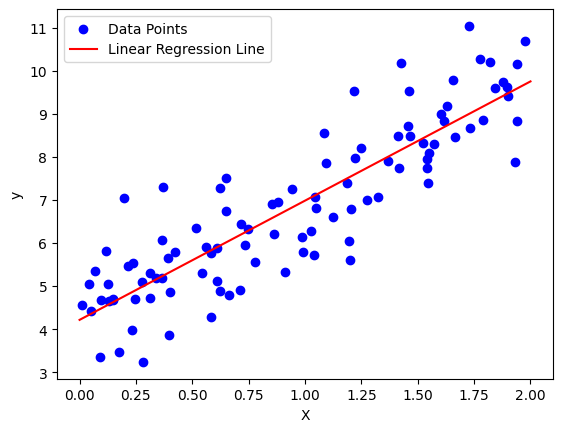

In [14]:
# Visualize the data and linear regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_predict, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


CONCLUSION:

In this study, we delved into fundamental concepts of machine learning, focusing on the K-Nearest Neighbors (K-NN) algorithm and linear regression. The K-NN algorithm, a non-parametric and lazy learning technique, was explored in detail. By leveraging the Euclidean distance metric, K-NN identifies the K-nearest neighbors to a given data point for classification or regression tasks. The choice of the optimal K value is pivotal, often determined empirically through techniques like cross-validation.

Additionally, we examined the essentials of linear regression, a supervised learning algorithm used for predicting continuous numerical outcomes. We implemented a simple linear regression model using gradient descent optimization, minimizing the Mean Squared Error (MSE) loss function. The MSE served as a metric to evaluate the performance of the regression model, representing the average squared difference between predicted and actual values.

Through practical implementation in Python, we witnessed the interplay of these concepts. K-NN showcased its versatility in classification tasks, relying on the principle of proximity in feature space. Linear regression, on the other hand, demonstrated the iterative nature of optimization, iteratively adjusting model parameters to minimize prediction errors.

This study not only provided a hands-on understanding of these fundamental machine learning techniques but also highlighted the importance of selecting appropriate algorithms, understanding their internal mechanisms, and tuning hyperparameters for optimal performance. As machine learning continues to revolutionize various fields, mastering these foundational concepts remains crucial for aspiring data scientists and practitioners, enabling them to tackle real-world problems effectively and make data-driven decisions.

In [15]:
!jupyter nbconvert --to html nombre_de_tu_notebook.ipynb


[NbConvertApp] WARNING | pattern 'nombre_de_tu_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e